## Model Iterations:

Using a combination of governance characteristics and organizational characteristics (revenue, assets, ect.) I will predict the salary of Directors & Trustees.

#### Table of Contents:

1. [Import Data](#IMPORT)
1. [Multinomial Logistic](#multinomial)
1. [Random Forest Classifier](#random_forest)
1. [Gradient Boost Classifier](#gbc)
1. [Support Vector Classifier](#svc)
1. [Summary Results](#results)


<!-- 
1. [HIERARCHICAL](#Hierarchical)
1. [CONCLUSTION/NEXT STEPS](#Conclusion) -->

In [272]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# plt.style.use('bmh')
# import warnings
# from pandas.core.common import SettingWithCopyWarning
# warnings.simplefilter(action="ignore", category=[SettingWithCopyWarning])
# warnings.simplefilter(action="ignore", category=[FutureWarning])

import jenkspy
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [26]:
# import time start_time = time.time() model() end_time = time.time()
# time_taken = end_time - start_time

## IMPORT DATA

In [363]:
# import modeling dataset
X = pd.get_dummies(pd.read_csv('02.data/model_dataset.csv'))
y = pd.read_csv('02.data/target_categories.csv')

# y = pd.read_csv('02.data/target_categories.csv', header=None, squeeze=True)

In [361]:
# verify the size of target and
# feature datasets are the same
X.shape[0] == y.shape[0]

False

In [364]:
y.head()

,reportable_comp,box_cox_label
0,198085.0,6
1,87550.0,2
2,64575.0,0
3,62180.0,0
4,130513.0,4


## MODEL ITERATIONS

### Multinomial Logistic
<a id='multinomial'></a>

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [122]:
log_clf = LogisticRegression().fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [123]:
log_clf.score(X_test, y_test)

0.22702387885847408

In [124]:
X_test['pred'] = log_clf.predict(X_test)
X_test['actual'] = y_test

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)

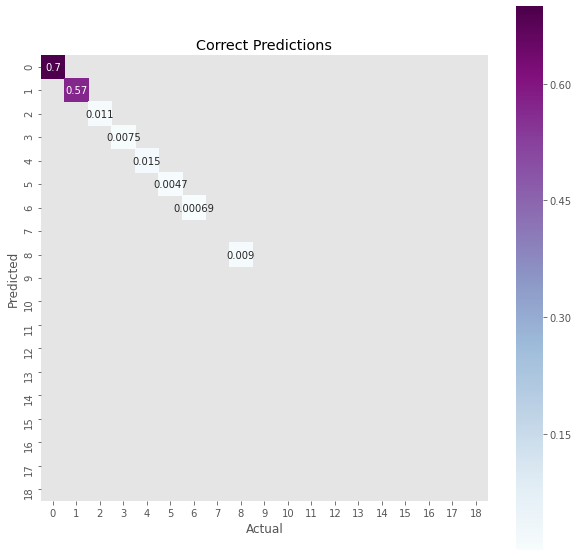

In [126]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))).replace(0, np.nan),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Correct Predictions');

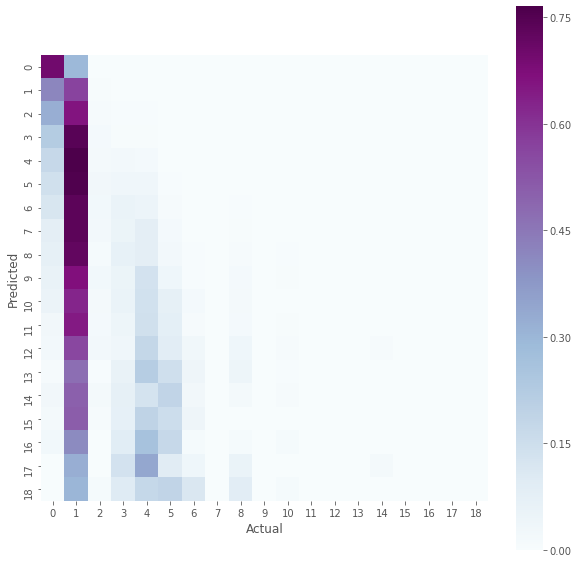

In [127]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
plt.title('Incorrect Predictions');

I'm seeing a pattern here similar to what I saw when I had more bins.  My model is predicting a higher category than the person is actully earning.

## Random Forest Classifier
<a id='random_forest'></a>

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [178]:
rfc = ensemble.RandomForestClassifier()

# cross_val_score(rfc, X, y, cv=5)

In [179]:
rfc.fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [180]:
rfc.score(X_test, y_test)

0.2712094738885653

In [182]:
X_test['pred'] = rfc.predict(X_test)
X_test['actual'] = y_test

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [183]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)

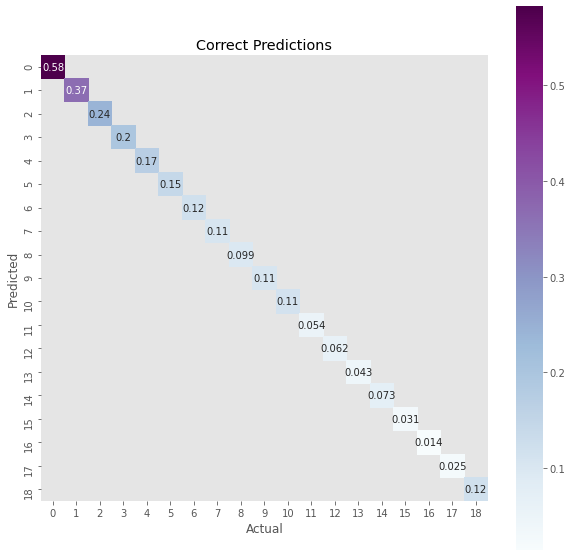

In [184]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))).replace(0, np.nan),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Correct Predictions');

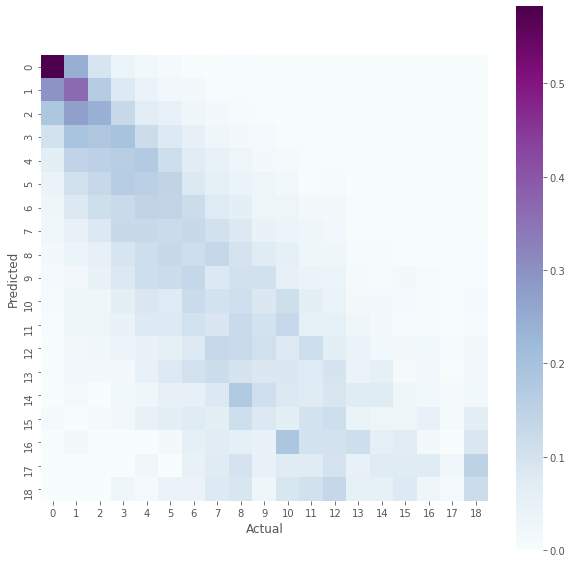

In [185]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
plt.title('Incorrect Predictions');

In [214]:
f_importances = pd.Series(rfc.feature_importances_, 
          X_train.columns).sort_values(ascending=False)

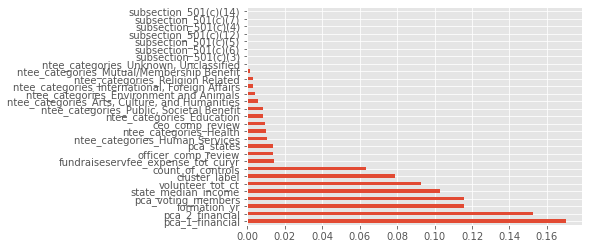

In [220]:
f_importances.plot(kind='barh');

With the sharp decrease below 5%, I will exclude all features below that level.

In [217]:
f_importances[f_importances > .05].index

Index(['pca_1_financial', 'pca_2_financial', 'formation_yr',
       'pca_voting_members', 'state_median_income', 'volunteer_tot_ct',
       'cluster_label', 'count_of_controls'],
      dtype='object')

### Random Forest Classifier 2nd Iteration - selecting only the top features

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X[f_importances[f_importances > .05].index]
                                                    , y, test_size = 0.2)

In [226]:
rfc = ensemble.RandomForestClassifier()

# cross_val_score(rfc, X, y, cv=5)

In [227]:
rfc.fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [228]:
rfc.score(X_test, y_test)

0.2681032809163269

In [229]:
X_test['pred'] = rfc.predict(X_test)
X_test['actual'] = y_test

In [230]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)

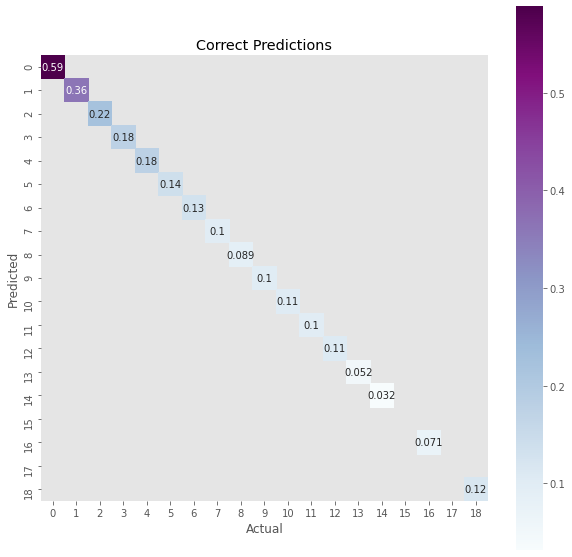

In [231]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))).replace(0, np.nan),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Correct Predictions');

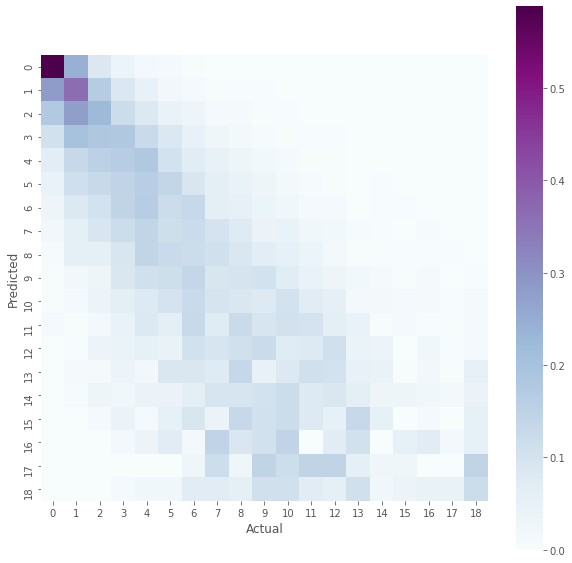

In [232]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
plt.title('Incorrect Predictions');

In [236]:
f_importances = pd.Series(rfc.feature_importances_, 
          X_train.columns).sort_values(ascending=False)

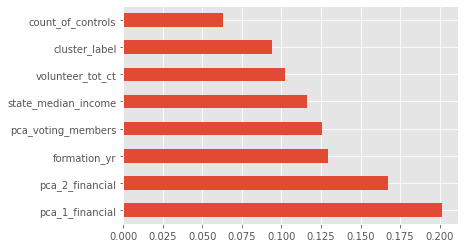

In [237]:
f_importances.plot(kind='barh');

Reducing features had limited impact on my model performance.

## Gradient Boost Classifier
<a id='gbc'></a>

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [112]:
gbc = ensemble.GradientBoostingClassifier()

In [ ]:
# cross_val_score(gbc, X, y, cv=5)

In [113]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [260]:
gbc.score(X_test, y_test)

0.28045039798097454

In [261]:
X_test['pred'] = gbc.predict(X_test)
X_test['actual'] = y_test

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [262]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)

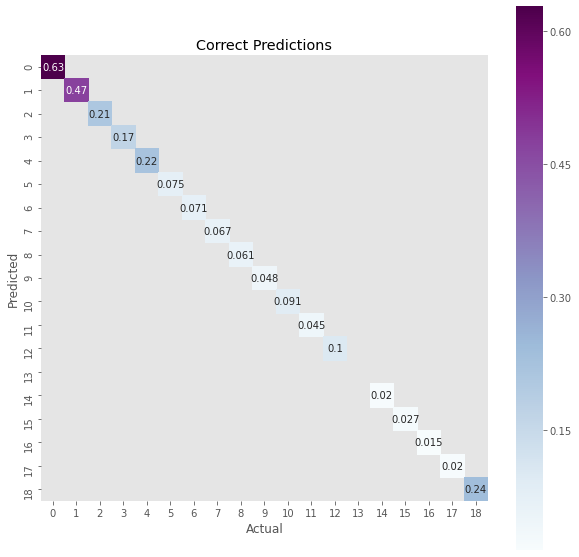

In [263]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))).replace(0, np.nan),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Correct Predictions');

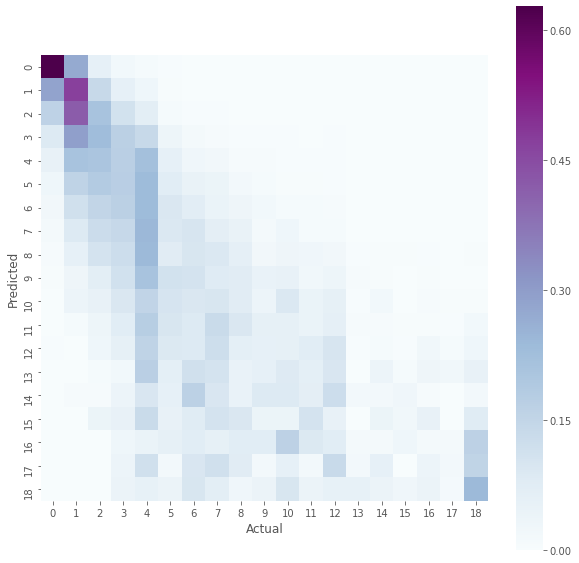

In [264]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
plt.title('Incorrect Predictions');

GBR struggles about the same amount as SVC and Logistic Multinomial Classifier.

In [265]:
f_importances = pd.Series(gbc.feature_importances_, 
          X_train.columns).sort_values(ascending=False)

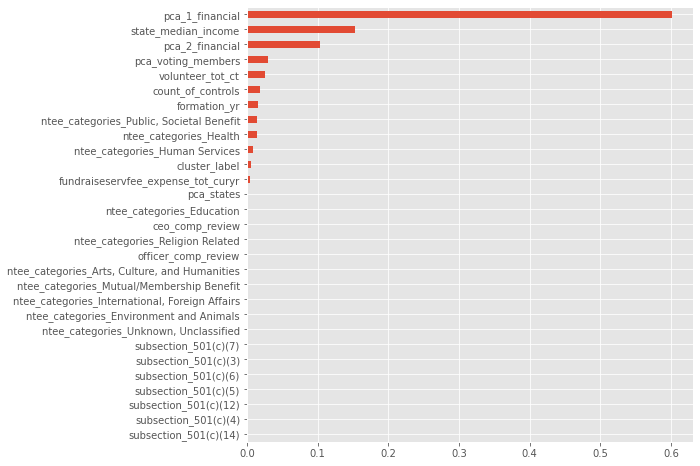

In [266]:
f_importances.sort_values().plot(kind='barh', figsize=(8, 8));

### Gradient Boost 2nd Iteration - selecting only the top features.

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X[f_importances[f_importances > .05].index]
                                                    , y, test_size = 0.2)

In [268]:
gbc = ensemble.GradientBoostingClassifier()

In [269]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [270]:
gbc.score(X_test, y_test)

0.27505338769171034

Reducing features to only the top 5 hurt gradient boost performance.

<a id='svc'></a>
## Support Vector Classifier
This is taking forever, I should subset features then model.

In [282]:
scaler = StandardScaler()
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

# must convert to array and reshape
# otherwise error message
# y = sc_y.fit_transform(np.array(y).reshape(-1, 1))

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [284]:
svc = SVC(kernel='rbf')

In [206]:
# svr.fit(X_train, y_train)

In [271]:
# cross_val_score(svr, X, y, cv=3)

In [286]:
svc.fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [287]:
svc.score(X_test, y_test)

0.23459522422830517

SVC has performed worse than any of the other models.

In [292]:
pred = svc.predict(X_test)
actual = y_test

In [293]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(actual, pred) / \
confusion_matrix(actual, pred).sum(axis=1, keepdims=True)

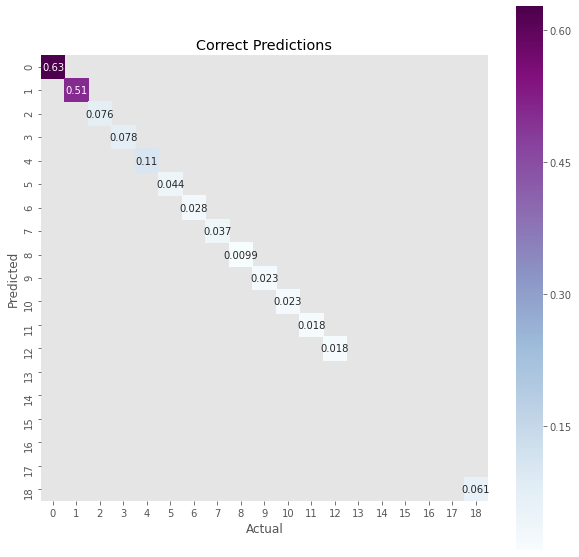

In [295]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))).replace(0, np.nan),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Correct Predictions');

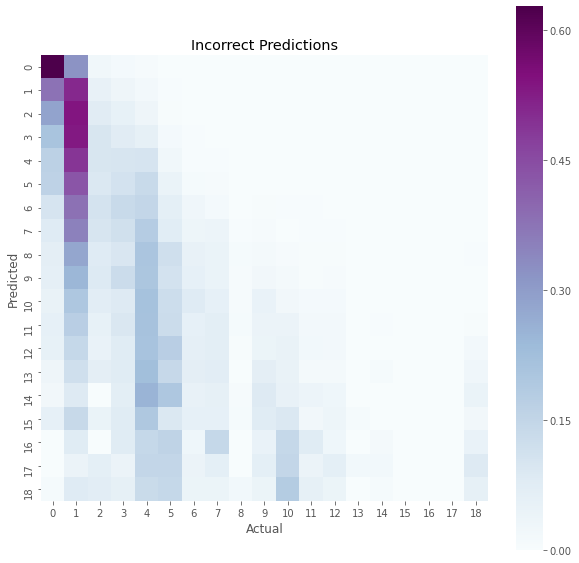

In [296]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
plt.title('Incorrect Predictions');

Interesting how SVC struggled most with classifiction for categories on the smaller end of the spectrum.

In [300]:
X.columns

Index(['pca_voting_members', 'pca_1_financial', 'pca_2_financial',
       'formation_yr', 'state_median_income', 'volunteer_tot_ct',
       'fundraiseservfee_expense_tot_curyr', 'ceo_comp_review',
       'officer_comp_review', 'count_of_controls', 'cluster_label',
       'subsection_501(c)(3)', 'subsection_501(c)(6)', 'subsection_501(c)(5)',
       'subsection_501(c)(14)', 'subsection_501(c)(12)',
       'subsection_501(c)(4)', 'subsection_501(c)(7)', 'pca_states',
       'ntee_categories_Arts, Culture, and Humanities',
       'ntee_categories_Education', 'ntee_categories_Environment and Animals',
       'ntee_categories_Health', 'ntee_categories_Human Services',
       'ntee_categories_International, Foreign Affairs',
       'ntee_categories_Mutual/Membership Benefit',
       'ntee_categories_Public, Societal Benefit',
       'ntee_categories_Religion Related',
       'ntee_categories_Unknown, Unclassified'],
      dtype='object')

In [301]:
f_importances = pd.Series(svc.feature_importances_, 
          X.columns).sort_values(ascending=False)

AttributeError: 'SVC' object has no attribute 'feature_importances_'

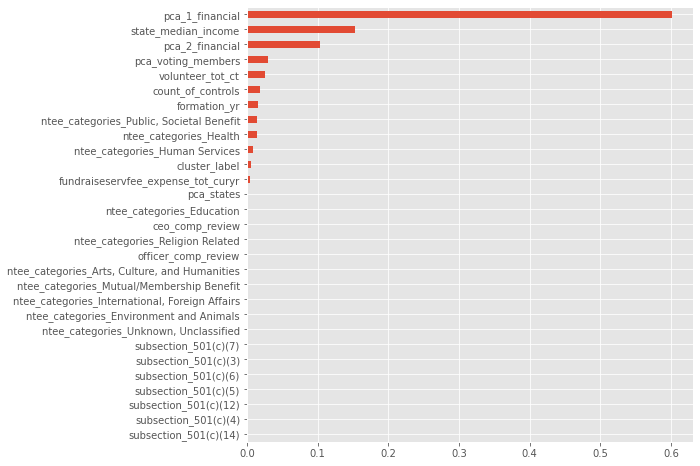

In [266]:
# f_importances.sort_values().plot(kind='barh', figsize=(8, 8));

## ROC curve examining specific categories?

## Feature engineering
Transform specific categories to allow the model to do a better job of prediction.

In [305]:
X.shape

(128775, 29)

In [310]:
X_trans = X.copy()

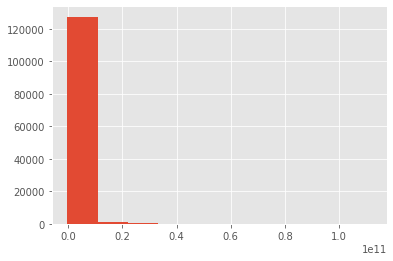

In [306]:
X.pca_1_financial.hist()

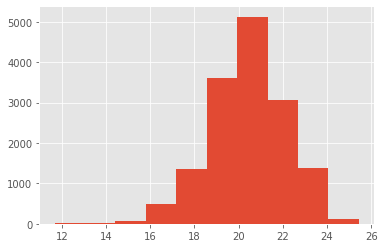

In [308]:

X.pca_1_financial.transform(np.log).hist()

In [311]:
X_trans.pca_1_financial = X.pca_1_financial.transform(np.log)

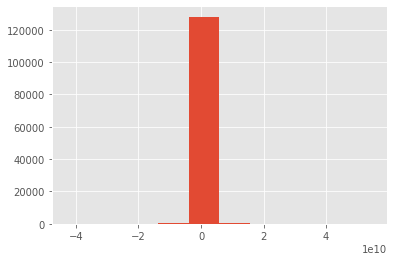

In [307]:
X.pca_2_financial.hist()

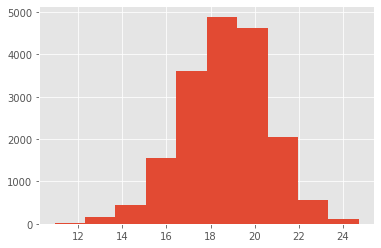

In [309]:
X.pca_2_financial.transform(np.log).hist()

In [312]:
X_trans.pca_2_financial = X.pca_2_financial.transform(np.log)

In [304]:
y.value_counts()

1     23509
0     21640
2     18587
3     15356
4     12400
5      9577
6      7243
7      5363
8      3906
9      3061
10     2268
11     1708
12     1306
13      869
14      622
15      415
18      378
16      342
17      225
Name: 0, dtype: int64

In [348]:
X.isna().sum()

pca_voting_members                                0
pca_1_financial                                   0
pca_2_financial                                   0
formation_yr                                      0
state_median_income                               0
volunteer_tot_ct                                  0
fundraiseservfee_expense_tot_curyr                0
ceo_comp_review                                   0
officer_comp_review                               0
count_of_controls                                 0
cluster_label                                     0
subsection_501(c)(3)                              0
subsection_501(c)(6)                              0
subsection_501(c)(5)                              0
subsection_501(c)(14)                             0
subsection_501(c)(12)                             0
subsection_501(c)(4)                              0
subsection_501(c)(7)                              0
pca_states                                        0
ntee_categor

In [ ]:
X.pca_1_financial

In [320]:
X_trans.pca_1_financial.value_counts(dropna=False)

NaN          113525
23.961652       157
23.750186       125
23.452089       101
22.624928        69
              ...  
17.695519         1
20.431511         1
14.456517         1
16.651010         1
18.522196         1
Name: pca_1_financial, Length: 1802, dtype: int64

In [317]:
# why did log create so many nan values?
X_trans.isna().sum()

pca_voting_members                                     0
pca_1_financial                                   113525
pca_2_financial                                   110747
formation_yr                                           0
state_median_income                                    0
volunteer_tot_ct                                       0
fundraiseservfee_expense_tot_curyr                     0
ceo_comp_review                                        0
officer_comp_review                                    0
count_of_controls                                      0
cluster_label                                          0
subsection_501(c)(3)                                   0
subsection_501(c)(6)                                   0
subsection_501(c)(5)                                   0
subsection_501(c)(14)                                  0
subsection_501(c)(12)                                  0
subsection_501(c)(4)                                   0
subsection_501(c)(7)           

### transform sqrt

In [324]:
X_trans_sqrt = X.copy()

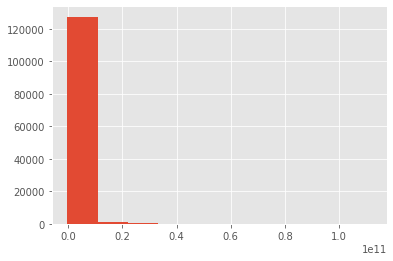

In [306]:
X.pca_1_financial.hist()

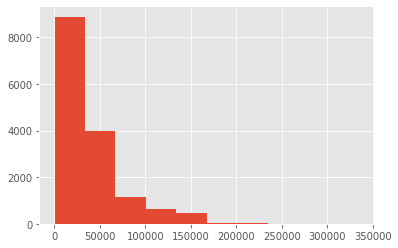

In [321]:
X.pca_1_financial.transform(np.sqrt).hist()

In [325]:
X_trans_sqrt.pca_1_financial = X.pca_1_financial.transform(np.sqrt)

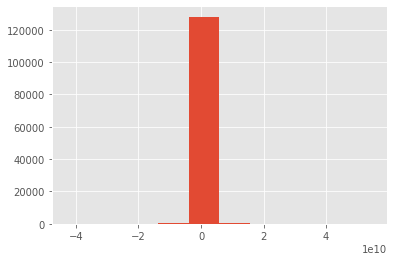

In [307]:
X.pca_2_financial.hist()

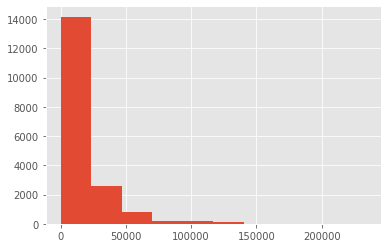

In [323]:
X.pca_2_financial.transform(np.sqrt).hist()

In [326]:
X_trans_sqrt.pca_2_financial = X.pca_2_financial.transform(np.sqrt)

In [330]:
X_trans_sqrt.isna().sum()

pca_voting_members                                     0
pca_1_financial                                   113525
pca_2_financial                                   110747
formation_yr                                           0
state_median_income                                    0
volunteer_tot_ct                                       0
fundraiseservfee_expense_tot_curyr                     0
ceo_comp_review                                        0
officer_comp_review                                    0
count_of_controls                                      0
cluster_label                                          0
subsection_501(c)(3)                                   0
subsection_501(c)(6)                                   0
subsection_501(c)(5)                                   0
subsection_501(c)(14)                                  0
subsection_501(c)(12)                                  0
subsection_501(c)(4)                                   0
subsection_501(c)(7)           

### remove outliers

In [337]:
X_rem_outliers.pca_1_financial.quantile(.95)

1117574781.9802713

In [334]:
X_rem_outliers = X.copy()

In [338]:
X_rem_outliers.pca_1_financial.clip(upper=X_rem_outliers.pca_1_financial.quantile(.95), inplace=True)

In [339]:
X_rem_outliers.pca_2_financial.clip(upper=X_rem_outliers.pca_2_financial.quantile(.95), inplace=True)

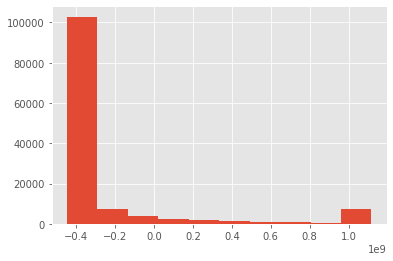

In [340]:
X_rem_outliers.pca_1_financial.hist()

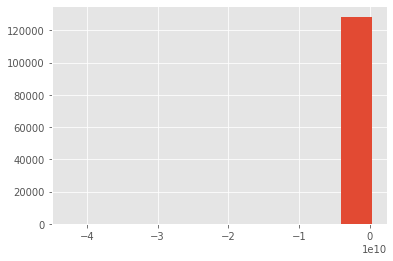

In [341]:
X_rem_outliers.pca_2_financial.hist()

## Gradient Boost Classifier - outliers removed
<!-- <a id='gbc'></a> -->

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X_rem_outliers, y, test_size = 0.2)

In [343]:
gbc = ensemble.GradientBoostingClassifier()

In [ ]:
# cross_val_score(gbc, X, y, cv=5)

In [344]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [349]:
gbc.score(X_test, y_test)

0.2803339157445156

In [350]:
X_test['pred'] = gbc.predict(X_test)
X_test['actual'] = y_test

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [351]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)

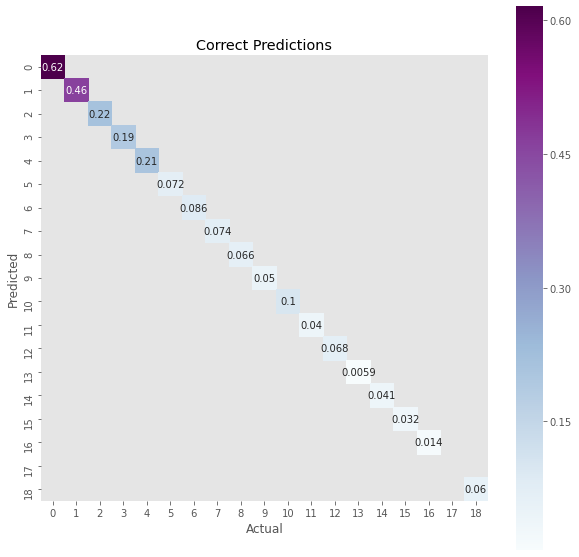

In [352]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))).replace(0, np.nan),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Correct Predictions');

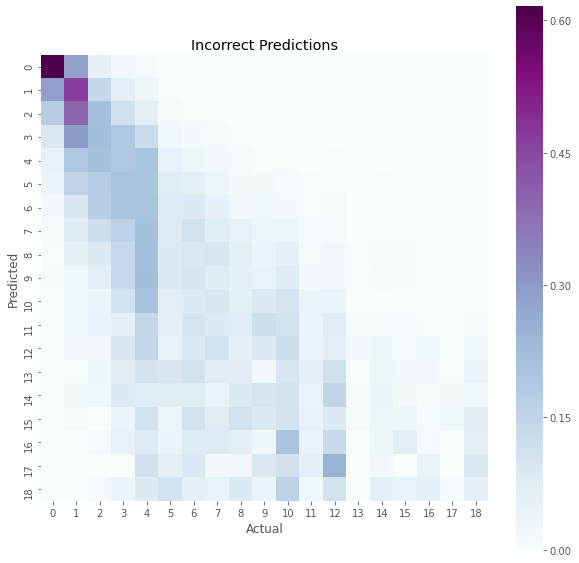

In [353]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
plt.title('Incorrect Predictions');

GBR struggles about the same amount as SVC and Logistic Multinomial Classifier.

In [354]:
f_importances = pd.Series(gbc.feature_importances_, 
          X_train.columns).sort_values(ascending=False)

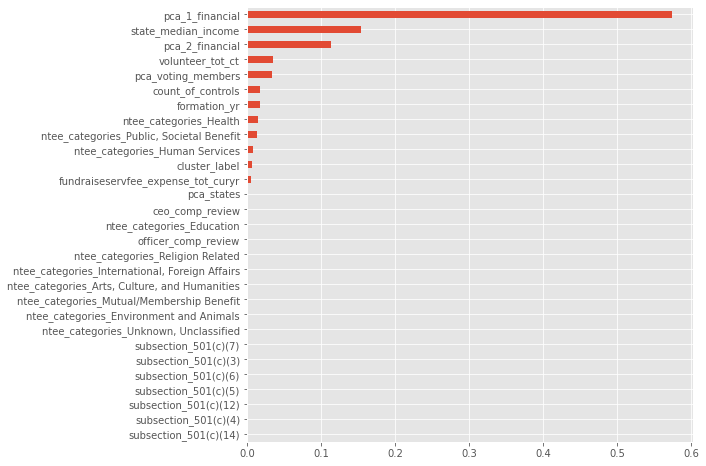

In [355]:
f_importances.sort_values().plot(kind='barh', figsize=(8, 8));

### Adjust target feature distribution

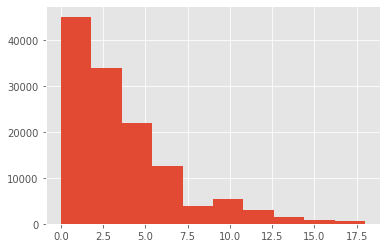

In [356]:
y.hist()

## Summary Results
<a id='results'></a>